In [4]:
# from model import mix
from model_upgrade import mix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mix = mix()

In [6]:
mix.df_rocrit.columns

Index(['Mass', 'Teff', 'logg', 'Age', 'log(L/Lsun)', 'kepmag', 'Prot', 'FeH',
       'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', '2mass_j', '2mass_h', '2mass_k',
       'distmod', 'av'],
      dtype='object')

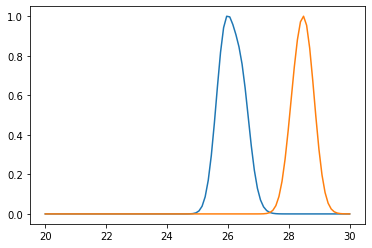

In [8]:
mix.select_down()
mix.make_kde()
mix.plot_kde_example()

In [16]:
dfile = '../data/atium.csv'
df = pd.read_csv(dfile)

In [17]:
df.head(10)

,Unnamed: 0,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp
0,0,1435467,6326,3.0164,70.369,77,0.034,0.10,6.3,0.01,...,0.059509,0.620728,6.541180,0.757775,0.672485,11.669772,0.724637,NaN,0,0.000777
1,1,2837475,6614,1.6270,75.729,77,0.041,0.10,8.2,0.01,...,0.046604,0.154079,3.499114,0.172064,0.555348,22.351415,0.540087,NaN,0,0.000587
2,2,3427720,6045,2.2339,120.068,77,0.031,0.10,10.7,-0.06,...,0.031153,11.821919,31.590512,10.236450,0.305072,1.473754,0.278017,NaN,0,0.000607
3,3,3456181,6384,2.0901,52.264,77,0.041,0.10,8.3,-0.15,...,0.059344,2.790842,10.699926,2.006340,0.734456,8.634898,0.746225,NaN,0,0.000788
4,4,3632418,6193,2.6331,60.704,77,0.019,0.10,3.0,-0.12,...,0.034584,0.729588,11.205550,0.624963,0.222056,8.216637,0.228105,NaN,0,0.000551
5,5,3656476,5668,8.3663,93.194,77,0.018,0.10,7.0,0.25,...,0.040597,12.682362,48.040844,8.116435,0.111304,1.201602,0.112223,NaN,0,0.000671
6,6,3735871,6107,2.3457,123.049,77,0.047,0.10,16.6,-0.04,...,0.034676,2.465683,15.810470,1.821666,0.259646,3.284125,0.254256,NaN,0,0.000671
7,7,4914923,5805,7.5678,88.531,77,0.019,0.10,6.3,0.08,...,0.030525,3.536735,21.393839,5.394345,0.153858,2.315801,0.153948,NaN,0,0.000867
8,8,5184732,5846,4.8529,95.545,77,0.024,0.10,4.4,0.36,...,0.027157,1.865728,19.907543,1.282151,0.111548,3.173614,0.110155,NaN,0,0.000804
9,9,5773345,6130,2.5533,57.303,84,0.030,0.09,5.7,0.21,...,0.062993,0.508977,5.928397,0.707415,0.678823,9.502726,0.669663,NaN,0,0.000673


In [18]:
df['logage'] = np.log(df.age)
df['uplogage'] = np.log(df.age + df.upage) - df.logage
df['lologage'] = df.logage - np.log(df.age - df.loage)

df['logP'] = np.log(df.P)
df['uplogP'] = np.log(df.P + df.u_P) - df.logP
df['lologP'] = df.logP - np.log(df.P - df.l_P)

In [19]:
df.head(9)

,Unnamed: 0,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,...,u_vsini,rhat_flag,eye_flag,ebprp,logage,uplogage,lologage,logP,uplogP,lologP
0,0,1435467,6326,3.0164,70.369,77,0.034,0.1,6.3,0.01,...,0.724637,NaN,0,0.000777,1.104064,0.151979,0.123822,1.878118,0.109614,0.099705
1,1,2837475,6614,1.6270,75.729,77,0.041,0.1,8.2,0.01,...,0.540087,NaN,0,0.000587,0.486738,0.066457,0.114278,1.252510,0.048003,0.045033
2,2,3427720,6045,2.2339,120.068,77,0.031,0.1,10.7,-0.06,...,0.278017,NaN,0,0.000607,0.803749,0.101885,0.113456,3.452857,0.280684,0.468762
3,3,3456181,6384,2.0901,52.264,77,0.041,0.1,8.3,-0.15,...,0.746225,NaN,0,0.000788,0.737212,0.059349,0.063095,2.370237,0.171858,0.302225
4,4,3632418,6193,2.6331,60.704,77,0.019,0.1,3.0,-0.12,...,0.228105,NaN,0,0.000551,0.968162,0.064595,0.069058,2.416409,0.054273,0.067326
5,5,3656476,5668,8.3663,93.194,77,0.018,0.1,7.0,0.25,...,0.112223,NaN,0,0.000671,2.124212,0.187442,0.207113,3.872052,0.156105,0.306513
6,6,3735871,6107,2.3457,123.049,77,0.047,0.1,16.6,-0.04,...,0.254256,NaN,0,0.000671,0.852584,0.366386,0.447586,2.760672,0.109051,0.169547
7,7,4914923,5805,7.5678,88.531,77,0.019,0.1,6.3,0.08,...,0.153948,NaN,0,0.000867,2.023902,0.198416,0.269637,3.063103,0.224858,0.180702
8,8,5184732,5846,4.8529,95.545,77,0.024,0.1,4.4,0.36,...,0.110155,NaN,0,0.000804,1.579576,0.279530,0.199678,2.991099,0.062416,0.098407


In [20]:
stars = []
for idx, row in df.iterrows():
    mass = [row.modmass, max([row.upmodmass, row.lomodmass])]
    teff = [row.Teff, row.eTeff]
    logage = [row.logage, max([row.uplogage, row.lologage])]
    logprot = [row.logP, max([row.uplogP, row.lologP])]
    feh = [row.feh, row.efeh]
    stars.append({'ID': str(row.KIC), 
                  'mass': mass, 
                  'teff': teff, 
                  'logage':  logage, 
                  'logprot': logprot,
                  'feh': feh})

In [21]:
%%time
mix.run_one_star(stars[0])

CPU times: user 7min 42s, sys: 10.8 s, total: 7min 53s
Wall time: 9min 1s


In [22]:
%%time
mix.run_one_star(stars[8])

CPU times: user 8min 11s, sys: 12.1 s, total: 8min 23s
Wall time: 9min 31s


In [23]:
%%time
mix.run_one_star(stars[30])

CPU times: user 12min 5s, sys: 13.8 s, total: 12min 19s
Wall time: 13min 27s
